<a href="https://colab.research.google.com/github/murtazav/Model_predictive_control/blob/master/visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# best controller parameterfinder using genetic algorithm
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
population = 20
kp_arr = np.zeros(population)
ki_arr = np.zeros(population)
fit_arr = np.zeros(population)

kp_max = 100.0
kp_min = 0.0
ki_max = 100.0
ki_min = 0.0
itr = 100



In [0]:
 #environment with bicycle model which returns fitness of a controller
def envm(kp, ki):
  mfl=158  # mass at front left wheel
  mfr=137  # mass at front right wheel
  mrl=360  # mass at rear left wheel
  mrr=269  # mass at front right wh

  m = 924  #mass of the vehicle

  lf= 1.31  # location of centre of gravity from the front axle
  lr=0.62   # location of centre of gravity from the rear axle
  Iz=748    # moment of inertia
  l=lf+lr

  V=1
  #cornering stiffness of tyre
  Cf=27359
  Cr=58535
  dt=0.01
  tf=10
  vy = np.zeros(1500)
  vy_dot = np.zeros(1500)
  delt_4 = np.zeros(1500) 
  theta_dot = np.zeros(1500)
  theta_4 = np.zeros(1500)
  theta_des = np.zeros(1500)
  theta_ddot = np.zeros(1500)
  e = np.zeros(1500)
  e_int = np.zeros(1500)
  fitness =0
  time = np.zeros(15000)
  for i in range(1,len(time)):
    time[i] = time[i-1]+dt
  i=1
  for t in time[0:1000]:
    if i>=100:
      theta_des[i]=0.349

    e[i] = (theta_des[i]-theta_4[i-1])
    fitness = fitness - np.power(t,2)*np.absolute(e[i])*dt
    e_int[i] = e_int[i-1]+e[i]*0.001
    delt_4[i]=kp*e[i]+ki*e_int[i]

    vy_dot[i]=-V*theta_dot[i-1]+1/m*(Cr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt_4[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt_4[i]))
    theta_ddot[i]=1/Iz*(Cr*lr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt_4[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt_4[i])*lf)

    theta_dot[i] = theta_ddot[i]*dt +theta_dot[i-1]
    theta_4[i] = theta_dot[i]*dt+theta_4[i-1]
    vy[i] = vy_dot[i]*dt+vy[i-1]
    i = i+1 
    #print(fitness)
  #plt.plot(time[0:10000],theta_4[0:10000]*180/np.pi)
  #plt.plot(time[0:10000],theta_des[0:10000]*180/np.pi)
  
  #plt.plot(time[0:10000],delt_4[0:10000]*180/np.pi)
  #plt.legend(['heading_angle','desired heading','steering angle'])
  #plt.xlabel('time in s')
  #plt.ylabel('Angle in degrees')
  # linearly penalizing max steering angle, max overshoot, randomly improving fitness with mean 5 and std 5 to introduce luck in evolution process
  fitness = 10*fitness - 40*np.amax(delt_4[0:1000]) -100*(np.amax(theta_4[0:1000])-np.amax(theta_des[0:1000])) + (np.random.randn()*5+5)
  return fitness



In [0]:
def envm(kp, ki):
    mfl=158 # mass at front left wheel
    mfr=137 # mass at front right wheel
    mrl=360 # mass at rear left wheel
    mrr=269 # mass at front right wh
    m = 924 #mass of the vehicle
    lf= 1.31 # location of centre of gravity from the front axle
    lr=0.62 # location of centre of gravity from the rear axle
    Iz=748 # moment of inertia
    l=lf+lr
    V=3.8
    kd = 0
    
    #parametres of steering actuator circuit
    R = 0.317
    L = 0.0000823
    kt = 0.0302
    kb = 0.0301
    b = 0.0028677
    
    #cornering stiffness of tyre
    Cf=27359
    Cr=58535
    dt=0.01
    tf=10
    vy = np.zeros(1500)
    vy_dot = np.zeros(1500)
    delt = np.zeros(1500)
    theta_dot = np.zeros(1500)
    theta = np.zeros(1500)
    theta_des = np.zeros(1500)
    theta_ddot = np.zeros(1500)
    e = np.zeros(1500)
    e_int = np.zeros(1500)
    e_d = np.zeros(1500)
    e_phi=np.zeros(1500)
    eint_phi = np.zeros(1500)
    phi = np.zeros(1500)
    phi_des = np.zeros(1500)
    phi_dot = np.zeros(1500)
    kp_phi = 2
    ki_phi = 0
    v = np.zeros(1500)
    I = np.zeros(1500)
    fitness =0
    time = np.zeros(1500)
    for i in range(1,len(time)):
        time[i] = time[i-1]+dt
    i=1
    for t in time[0:1000]:
        if i>100:
            theta_des[i] = 0.349
        else:
            theta_des[i] = 0
        e[i] = theta_des[i]-theta[i-1]
        fitness = fitness - np.power(t,2)*np.absolute(e[i])*dt
        e_int[i] = e_int[i-1]+e[i]*dt
        if i>2:
            e_d[i] = (theta[i-1]-theta[i-2])/dt
        phi_des[i] = kp*e[i]+ki*e_int[i]+kd*e_d[i] 
        e_phi[i] = phi_des[i]-phi[i-1]
        eint_phi[i]=eint_phi[i-1]+dt*e_phi[i]
        v[i]=3555*(kp_phi*e_phi[i]+ki_phi*eint_phi[i])
        if v[i]>0:
            v[i]=20
        elif v[i]<0:
            v[i]=-20
        I[i]=L/R*(v[i]-kb*phi_dot[i-1])-L/(R*np.exp(R*t/L))*(v[i]-kb*phi_dot[i-1])
        phi_dot[i]=kt/b*I[i]
        phi[i]=phi[i-1]+dt*phi_dot[i]
        delt[i]=1/3555*phi[i]*6863.6364
           	#to use arc tan function from numpy library
        vy_dot[i]=-V*theta_dot[i-1]+1/m*(Cr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt[i]))
        theta_ddot[i]=1/Iz*(Cr*lr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt[i])*lf)
        theta_dot[i]=theta_ddot[i]*dt +theta_dot[i-1]
        theta[i]=theta_dot[i]*dt+theta[i-1]
        vy[i]=vy_dot[i]*dt+vy[i-1]
        i+=1
    #print(fitness)
    plt.plot(time[0:1000],theta[0:1000]*180/np.pi)
    plt.plot(time[0:1000],theta_des[0:1000]*180/np.pi)
    plt.plot(time[0:1000],delt[0:1000]*180/np.pi)
    plt.legend(['heading_angle','desired heading','steering angle'])
    plt.xlabel('time in s')
    plt.ylabel('Angle in degrees')
    # linearly penalizing max steering angle, max overshoot, randomly improving fitness with mean 5 and std 5 to introduce luck in evolution process
    fitness = 10*fitness - 50*np.amax(delt[0:1000]) -100*(np.amax(theta[0:1000])-np.amax(theta_des[0:1000])) + (np.random.randn()*5+5)
    return fitness

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in exp


-15.92691241693625

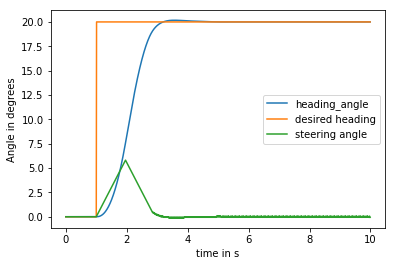

In [40]:
envm(0.24,0)

In [0]:
def envmm(kp,ki):
  fit=np.zeros((len(kp),len(kp[0])))
  for i in range(len(kp)):
    for j in range(len(kp[0])):
      fit[i][j] = envm(kp[i][j],ki[i][j])
  return fit

In [6]:
%matplotlib notebook
ax = plt.axes(projection="3d")
x= np.linspace(0,2,15)
y = np.linspace(0,2,15)
X,Y = np.meshgrid(x,y)
Z = envmm(X, Y)
print(Z)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in exp


[[-1132.58136903  -484.21257582  -269.06436315  -159.30481407
   -122.94298004   -86.55585031   -76.64457945  -134.14262438
   -183.18332586  -212.2210894   -265.53407328  -308.04660229
   -336.5525514   -368.02391133  -397.58419959]
 [ -920.748868    -699.48224927  -576.04672874  -480.26472121
   -448.15699532  -488.84420015  -531.06020312  -582.40705342
   -629.60107708  -649.2531196   -691.75542166  -689.842347
   -725.7422232   -741.19198388  -753.04115747]
 [-1681.45387283 -1475.97684512 -1380.29535897 -1311.39651443
  -1264.8068558  -1220.2979538  -1193.28861512 -1167.2850218
  -1145.25257295 -1123.3899283  -1111.00590746 -1114.11228615
  -1106.81317166 -1092.17863634 -1088.87709706]
 [-2407.00257608 -2208.188129   -2061.13732916 -1912.07965252
  -1816.12896035 -1738.360254   -1660.62484003 -1599.66099901
  -1548.98441203 -1508.95602845 -1464.65929091 -1439.76666794
  -1397.53429228 -1386.7833222  -1355.45688073]
 [-2699.28347052 -2534.11826363 -2396.06873424 -2263.86540989
  -21

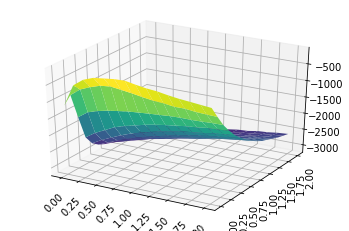

<Figure size 1440x792 with 0 Axes>

In [9]:
%matplotlib inline
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
plt.xticks(rotation=45)
plt.yticks(rotation='vertical')

plt.figure(figsize=(20, 11))
plt.show()



In [0]:
# to randomly generate a contorller within the range
def random_birth(kp_arr, ki_arr):
  for i in range(population):
    kp_arr[i] = random.uniform(kp_min, kp_max)
    ki_arr[i]= random.uniform(ki_max, kp_min)
  return kp_arr, ki_arr

# to generate offspring from the best parents with added mutation
def offspring(kp_mean, kp_std, ki_mean, ki_std):
  kp = np.absolute(np.random.randn()*kp_mean +kp_std)
  ki = np.absolute(np.random.randn()*ki_mean + ki_std)

  #mutation 
  if random.random() < 0.1 :
    kp = np.absolute(kp + 0.1*(np.random.randn()*kp_mean+kp_std))
    ki = np.absolute(ki + 0.1*(np.random.randn()*ki_mean+ki_std))
  return kp, ki
	



In [0]:
# to iteratively create and delete generations to reach the generaton with best fitness score
def iterations(kp_arr, ki_arr, fit_arr):
  for i in range(itr):
    for j in range(population):
      fit_arr[j] = envm(kp_arr[j], ki_arr[j])

    # sort remove the half controllers with worst fitness
    sorted_index = np.argsort(fit_arr)
    kp_arr = kp_arr[sorted_index]
    ki_arr = ki_arr[sorted_index]
    fit_arr = fit_arr[sorted_index]
    kpbest.append(kp_arr[-1])
    kibest.append(ki_arr[-1])
    fitbest.append(fit_arr[-1])
    print(str(kp_arr[-1])+'  '+str(ki_arr[-1])+'  '+str(fit_arr[-1]))
    # generate offsprings with the best four controllers

    kp_mean = np.average(kp_arr[int(population/2):population])
    kp_std = np.std(kp_arr[int(population/2):population])
    ki_mean = np.average(ki_arr[int(population/2):population])
    ki_std = np.std(ki_arr[int(population/2):population])
    for j in range(int(population/2)):
      kp_arr[j], ki_arr[j] = offspring(kp_mean, kp_std, ki_mean, ki_std)
   
  return kp_arr, ki_arr, fit_arr

In [0]:
kpbest=[]
kibest=[]
fitbest=[]
kp_arr, ki_arr = random_birth(kp_arr, ki_arr)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in exp


40.899678407381316  0.01972944795967635  -1349.4584036338997
40.899678407381316  0.01972944795967635  -1351.9010988210584
40.899678407381316  0.01972944795967635  -1350.9002899985733
48.580566968898054  0.20158755344802604  -1341.44809654008
136.36653516826834  0.2797170481662947  -1342.4872955583985
48.580566968898054  0.20158755344802604  -1341.7017330564306
136.36653516826834  0.2797170481662947  -1348.2919410115555
12.019898876028037  0.013970902341157498  -1294.5136054478837
12.019898876028037  0.013970902341157498  -1289.3134426070335
12.019898876028037  0.013970902341157498  -1284.71995179628
12.019898876028037  0.013970902341157498  -1293.5184633957585
12.019898876028037  0.013970902341157498  -1282.310312873526
0.45164230428058616  0.05249879778338142  -136.10536484188535
0.45164230428058616  0.05249879778338142  -124.20276164155204
0.4030346503785016  0.059289093106028506  -110.66224047055996
0.4030346503785016  0.059289093106028506  -102.94490325206635
0.4030346503785016  0.

(array([0.17390363, 0.0495939 , 0.02870685, 0.031347  , 0.33042847,
        0.28019714, 0.13870898, 0.16137001, 0.07775278, 0.03151684,
        0.25009947, 0.2217808 , 0.22447761, 0.15918957, 0.24077898,
        0.23195995, 0.21118471, 0.18416117, 0.2337728 , 0.21321636]),
 array([1.12046817e-05, 1.23028606e-04, 5.75166744e-05, 2.30077762e-05,
        6.10973344e-05, 5.72432670e-05, 1.07217328e-04, 2.22551048e-04,
        2.54792338e-05, 7.83262100e-05, 5.70431056e-05, 1.46217304e-05,
        1.35647905e-04, 8.07423555e-05, 7.74653986e-05, 1.38776959e-04,
        4.85861884e-05, 1.00765612e-04, 2.72869717e-05, 8.21723827e-05]),
 array([-832.87652978, -474.97556172, -272.02822505, -205.85941237,
         -93.6392118 ,  -24.12835999,  -21.38228793,  -21.15957668,
         -18.90101925,  -17.35972476,  -16.63757826,  -14.69911402,
         -13.06055223,  -13.00199557,  -12.139046  ,  -12.06233971,
          -6.22105913,   -6.20121542,   -5.42296412,   -2.05811771]))

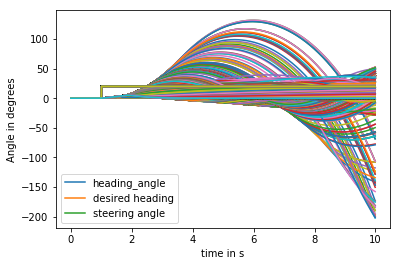

In [105]:
iterations(kp_arr, ki_arr, fit_arr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in exp


-17.240388258831256

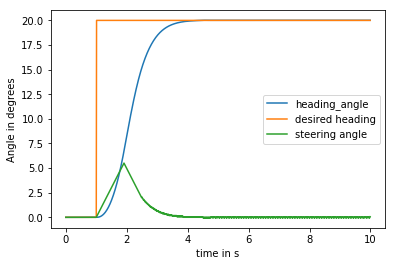

In [106]:
envm(0.21321636,8.21723827e-05)

In [109]:
len(kibest)

100

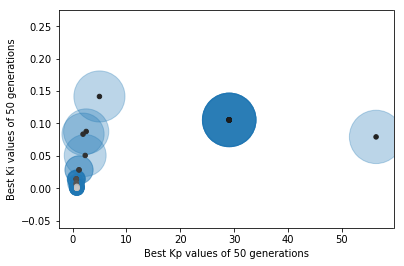

In [15]:
#v=1
kpbest=np.asarray(kpbest)
kibest=np.asarray(kibest)
fitbest=np.asarray(fitbest)
import pandas as pd
clr=[]
for i in range(50):
  clr.append(str((i*4+1)/255.))

plt.scatter(kpbest, kibest, s=-fitbest*3, alpha=0.3)


plt.scatter(kpbest,kibest, c=clr,s=20)

#plt.annotate('('+str(kpbest[-1])[0:5]+','+str(kibest[-1])[0:5]+')',(kpbest[-1],kibest[-1])[0:5])
plt.xlabel('Best Kp values of 50 generations')
plt.ylabel('Best Ki values of 50 generations')
plt.show()


In [0]:
def pp(kpbest,kibest,fitbest):
  kpbest=np.asarray(kpbest)
  kibest=np.asarray(kibest)
  fitbest=np.asarray(fitbest)
  import pandas as pd
  clr=[]
  clrr=[]
  j=2.5
  for i in range(100):
    clr.append((j/255.,j/255.,0))
    clrr.append((0,1-j/255.,0.8))
    j = j+2.5

  plt.scatter(kpbest, kibest, s=-fitbest*2, alpha=0.3,c=clrr)


  plt.scatter(kpbest,kibest, c=clr,s=20)

  #plt.annotate('('+str(kpbest[-1])[0:5]+','+str(kibest[-1])[0:5]+')',(kpbest[-1],kibest[-1])[0:5])
  plt.xlabel('Best Kp values of 50 generations')
  plt.ylabel('Best Ki values of 50 generations')
  plt.show()


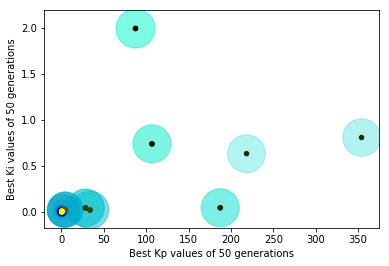

In [70]:
#v=1.7
pp(kpbest,kibest,fitbest)

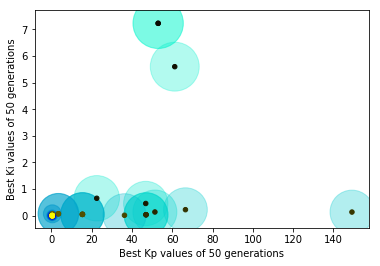

In [74]:
#v=2.4
pp(kpbest,kibest,fitbest)

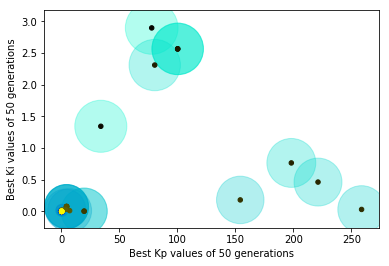

In [78]:
#v=3.1
pp(kpbest,kibest,fitbest)

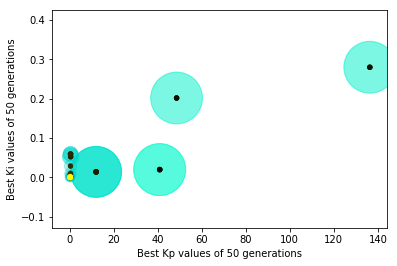

In [111]:
#v=3.8
pp(kpbest,kibest,fitbest)